# IEOR 242 Assignment 03
Analyzing five 10-K reports from 2014. This version of the script expects the MDA sections already extracted.

In [1]:
from bs4 import BeautifulSoup
import nltk
import glob
import re
import itertools
from collections import Counter
from wordcloud import WordCloud
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Path to the MDA files
REPORT_DIR = 'mda-sections/*.txt'

In [3]:
# Dict to describe where the files are from (known from the preprocessing steps)
file_dict = { 'mda-sections/mdna_0001532176-15-000008.txt' : 'REGN',
'mda-sections/mdna_0000875320-15-000012.txt' : 'VRTX',
'mda-sections/mdna_0000818479-15-000005.txt' : 'XRAY',
'mda-sections/mdna_0000731766-15-000007.txt' : 'UNH',
'mda-sections/mdna_0000310764-15-000022.txt' : 'SYK'}

In [4]:
# Create the tokenizer module
tokenizer = nltk.RegexpTokenizer(r'\w+')

In [5]:
# Create an empty pandas dataframe for the data
df = pd.DataFrame(columns=['company', 'token_count', 'nouns', 'verbs', 'adjectives'])

In [6]:
# Array to store the beautiful soups
soups = []

# Iterate over all files and create the soups
for i, filename in enumerate(glob.iglob(REPORT_DIR)):
    print(filename)
    
    # Add filename to the dataframe
    df.loc[i] = [file_dict[filename], 0, 0, 0, 0]

    # Read the text file with the MDA content
    text = open(filename, 'r').read().lower()

    # Create the soup
    soups.append(BeautifulSoup(text, 'html.parser'))

mda-sections/mdna_0001532176-15-000008.txt
mda-sections/mdna_0000875320-15-000012.txt
mda-sections/mdna_0000818479-15-000005.txt
mda-sections/mdna_0000731766-15-000007.txt
mda-sections/mdna_0000310764-15-000022.txt


In [7]:
df

,company,token_count,nouns,verbs,adjectives
0,REGN,0,0,0,0
1,VRTX,0,0,0,0
2,XRAY,0,0,0,0
3,UNH,0,0,0,0
4,SYK,0,0,0,0


In [8]:
# Generate tokens and POS tagging for all reports
tagged_store = []

for i, soup in enumerate(soups):
    tokens = tokenizer.tokenize(soup.get_text())
    df.loc[i, 'token_count'] = len(tokens)
    
    # Perform a POS tagging of all tokens and append it to the tagged_store
    # Description of POS identifiers: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
    tagged_store.append(nltk.pos_tag(tokens))

In [9]:
df

,company,token_count,nouns,verbs,adjectives
0,REGN,51032,0,0,0
1,VRTX,38184,0,0,0
2,XRAY,40591,0,0,0
3,UNH,35185,0,0,0
4,SYK,22624,0,0,0


In [10]:
# List for all words
all_words = list()
all_nouns = list()
all_verbs = list()
all_adjectives = list()

# Iterate over POS tagged reports and analyze them
for i, tokens_tagged in enumerate(tagged_store):

    # Create lists to store each POS
    nouns = []
    verbs = []
    adjectives = []
    others = []
    
    # Iterate over all tags
    for word, tag in tokens_tagged:
        # Categorize the word based on the tag
        if tag.startswith('N'):
            nouns.append(word)
        elif tag.startswith('V'):
            verbs.append(word)
        elif tag.startswith('J'):
            adjectives.append(word)
        else:
            others.append(word)

    df.loc[i, 'nouns'] = len(nouns)
    df.loc[i, 'verbs'] = len(verbs)
    df.loc[i, 'adjectives'] = len(adjectives)
    
    # Add nouns, verbs, adjectives to the words list
    all_nouns.extend(nouns)
    all_verbs.extend(verbs)
    all_adjectives.extend(adjectives)

all_words.extend(all_nouns)
all_words.extend(all_verbs)
all_words.extend(all_adjectives)

In [11]:
df

,company,token_count,nouns,verbs,adjectives
0,REGN,51032,16193,6098,4979
1,VRTX,38184,11963,4864,3932
2,XRAY,40591,12640,5009,4639
3,UNH,35185,11746,4469,4045
4,SYK,22624,7263,2809,2631


In [12]:
# Create list that combines all reports
tokens_tagged = list(itertools.chain(*tagged_store))
print('Total number of tokens:', len(tokens_tagged))
print('Total number of noun, verbs, adjectives:', len(all_words))

Total number of tokens: 187616
Total number of noun, verbs, adjectives: 103280


[('NN', 41495), ('IN', 24750), ('CD', 23688), ('JJ', 19842), ('NNS', 18285), ('DT', 14470), ('CC', 7393), ('VBN', 6631), ('TO', 4528), ('VBD', 3964), ('RB', 3753), ('VB', 3704), ('VBP', 3173), ('VBZ', 2982), ('VBG', 2795), ('PRP$', 1809), ('PRP', 1177), ('MD', 1026), ('WDT', 1012), ('JJR', 283), ('WRB', 157), ('$', 139), ('RBR', 120), ('JJS', 101), ('RP', 94)]


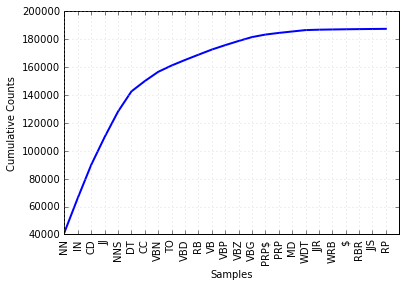

In [13]:
# Most common tags
tokens_tagged 
tag_fd = nltk.FreqDist(tag for (word, tag) in tokens_tagged)
print(tag_fd.most_common(25))
tag_fd.plot(25, cumulative=True)

[('company', 1614), ('income', 790), ('tax', 703), ('stock', 647), ('cash', 621), ('sales', 614), ('value', 599), ('assets', 551), ('statements', 496), ('development', 486), ('agreement', 444), ('costs', 443), ('year', 436), ('share', 406), ('companys', 405), ('product', 365), ('interest', 359), ('december31', 344), ('rate', 342), ('period', 340), ('operations', 339), ('loss', 331), ('expenses', 331), ('cost', 312), ('s', 302)]


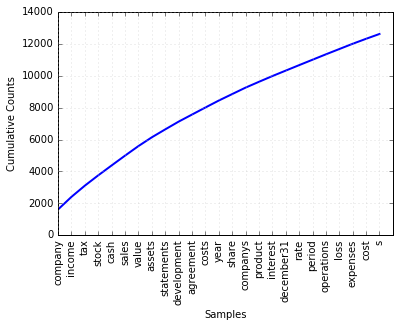

In [14]:
# Most common nouns
noun_fd = nltk.FreqDist(all_nouns)
print(noun_fd.most_common(25))
noun_fd.plot(25, cumulative=True)

[('are', 1141), ('is', 1002), ('be', 579), ('based', 510), ('related', 429), ('ended', 422), ('was', 410), ('have', 371), ('has', 287), ('were', 286), ('included', 269), ('incorporated', 259), ('including', 259), ('recorded', 258), ('recognized', 170), ('increased', 168), ('been', 167), ('s', 167), ('operating', 161), ('estimated', 150), ('following', 150), ('dated', 148), ('used', 142), ('expected', 139), ('include', 136)]


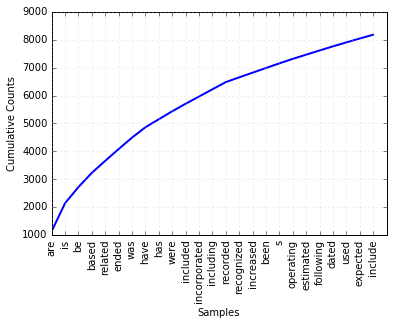

In [15]:
# Most common verbs
verb_fd = nltk.FreqDist(all_verbs)
print(verb_fd.most_common(25))
verb_fd.plot(25, cumulative=True)

[('financial', 820), ('other', 763), ('net', 619), ('fair', 451), ('consolidated', 413), ('certain', 356), ('due', 321), ('common', 299), ('united', 297), ('foreign', 237), ('current', 228), ('such', 214), ('u', 200), ('internal', 197), ('significant', 188), ('s', 187), ('effective', 176), ('related', 173), ('future', 162), ('new', 160), ('medical', 158), ('clinical', 157), ('available', 151), ('intangible', 146), ('annual', 144)]


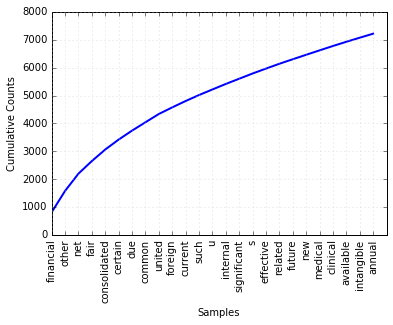

In [16]:
# Most common adjectives
adjective_fd = nltk.FreqDist(all_adjectives)
print(adjective_fd.most_common(25))
adjective_fd.plot(25, cumulative=True)

[('company', 1614), ('are', 1141), ('is', 1002), ('financial', 820), ('net', 815), ('income', 790), ('other', 763), ('tax', 703), ('s', 656), ('stock', 647), ('cash', 621), ('sales', 614), ('related', 602), ('value', 599), ('be', 579), ('assets', 551), ('based', 510), ('companys', 509), ('statements', 496), ('development', 486), ('fair', 479), ('consolidated', 475), ('costs', 452), ('agreement', 444), ('year', 436)]


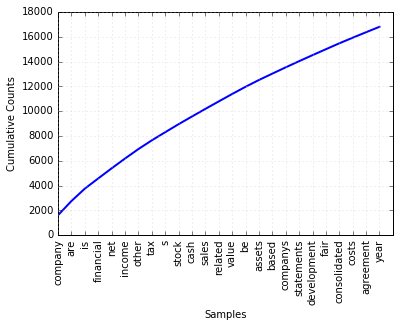

In [17]:
# Most common words
word_fd = nltk.FreqDist(all_words)
print(word_fd.most_common(25))
word_fd.plot(25, cumulative=True)

/home/stefan/anaconda3/lib/python3.5/site-packages/PIL/ImageDraw.py:104: UserWarning: setfont() is deprecated. Please set the attribute directly instead.
  "Please set the attribute directly instead.")


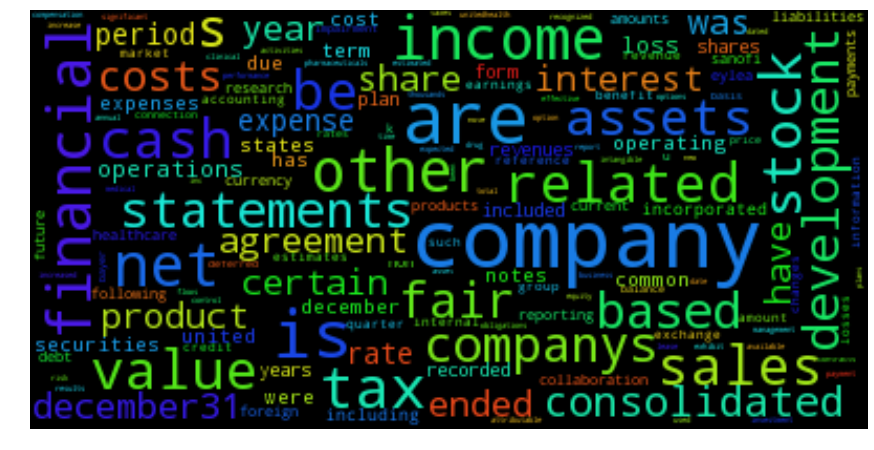

In [18]:
# Generate a word cloud
wc = WordCloud(max_font_size=40, relative_scaling=0.5).generate_from_frequencies(word_fd.most_common(1000))
plt.figure(figsize=(15, 10))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [19]:
# Create a dict to store analysis of the most common nouns
most_common_nouns = dict()

# Iterate over the 5 most common nouns
for (noun, count) in noun_fd.most_common(5):
    most_common_nouns[noun] = dict()

    # Iterate over POS tagged reports and look for the most common nouns
    for i, tokens_tagged in enumerate(tagged_store):
        
        # Look up how often this noun appeared in a given report
        noun_fd = nltk.FreqDist(map(lambda x: x[0], filter(lambda x: x[1].startswith('N'), tokens_tagged)))
        most_common_nouns[noun][i] = noun_fd.freq(noun)

print(most_common_nouns)

{'stock': {0: 0.015191749521398136, 1: 0.014043300175541252, 2: 0.004984177215189873, 3: 0.0072365060446109315, 4: 0.011703152967093488}, 'tax': {0: 0.011856975236213178, 1: 0.008108334029925604, 2: 0.013449367088607595, 3: 0.008939213349225268, 4: 0.019138097205011702}, 'company': {0: 0.03328598777249429, 1: 0.03318565577196356, 2: 0.03662974683544304, 3: 0.016516260854759067, 4: 0.0028913672036348617}, 'income': {0: 0.008028160316186006, 1: 0.011201203711443617, 2: 0.021914556962025315, 3: 0.008939213349225268, 4: 0.01982651796778191}, 'cash': {0: 0.007163589205212129, 1: 0.0097801554793948, 2: 0.013212025316455695, 3: 0.010301379192916738, 4: 0.013768415255404103}}
